In [437]:
import pandas as pd
import numpy as np
import sklearn                                    
from sklearn.decomposition import FactorAnalysis  
from sklearn import datasets   

from matplotlib import rcParams
import seaborn as sb
%matplotlib inline                    
rcParams['figure.figsize'] = 9, 6        
sb.set_style('whitegrid')             

### Column Indexes

In [438]:
column_idx = pd.DataFrame({'Column_Title': ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot',
                                            'floors','waterfront','view','condition','grade','sqft_above','sqft_basement',
                                            'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],
                           'Description': ['A notation for a house','Date house was sold','Prediction target',
                                          '# of bedrooms','# of bathrooms','square footage of the home',
                                          'square footage of the lot','Total floors (levels) in house',
                                          'House which has a view to a waterfront','Has been viewed',
                                          'How good the condition is ( Overall )','overall grade given to the housing unit, based on King County grading system',
                                          'square footage of house apart from basement','square footage of the basement',
                                          'Built Year','Year when house was renovated','zip','Latitude coordinate',
                                          'Longitude coordinate','Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area',
                                          'lotSize area in 2015(implies-- some renovations)']})
column_idx

,Column_Title,Description
0,id,A notation for a house
1,date,Date house was sold
2,price,Prediction target
3,bedrooms,# of bedrooms
4,bathrooms,# of bathrooms
5,sqft_living,square footage of the home
6,sqft_lot,square footage of the lot
7,floors,Total floors (levels) in house
8,waterfront,House which has a view to a waterfront
9,view,Has been viewed


### Load dataset

In [439]:
df = pd.read_csv('kc_house_data.csv')
print('Rows: %d, Columns: %d' % df.shape)
df.head()

Rows: 21613, Columns: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Clean data: drop the missing values

In [440]:
df = df.dropna(axis=0)                  # drop all the missing values
print('Rows: %d, Columns: %d' % df.shape)
df.head()

Rows: 21613, Columns: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Filter out the houses with the specified conditions

In [441]:
df = df.loc[(df['bedrooms'] >= 3) & (df['bedrooms'] <= 5) &(df['bathrooms'] >= 3.0) & (df['sqft_living'] >= 3000)] 
print('Rows: %d, Columns: %d' % df.shape)
# print(set(df.bedrooms))
# print(set(df.bathrooms))
df.head()

Rows: 1490, Columns: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
58,7922800400,20140827T000000,951000.0,5,3.25,3250,14342,2.0,0,4,4,8,3250,0,1968,0,98008,47.5880,-122.116,2960,11044
70,1525059190,20140912T000000,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
75,3276920270,20141105T000000,832500.0,4,4.00,3430,35102,2.0,0,0,4,10,2390,1040,1986,0,98075,47.5822,-121.987,3240,35020
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350


### Scatterplot:  Price vs. Sqrt_living

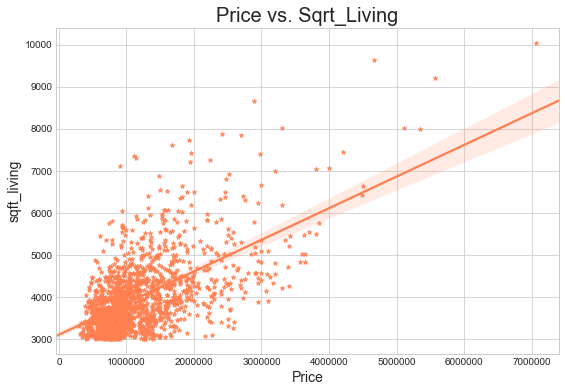

In [442]:
sb.regplot(x='price', y='sqft_living', data=df, scatter=True, scatter_kws={"s":20}, marker='*',color='coral')
plt.title('Price vs. Sqrt_Living', fontsize=20)
plt.xlabel('Price', fontsize=14)
plt.ylabel('sqft_living', fontsize=14);

### Scatterplot matrix

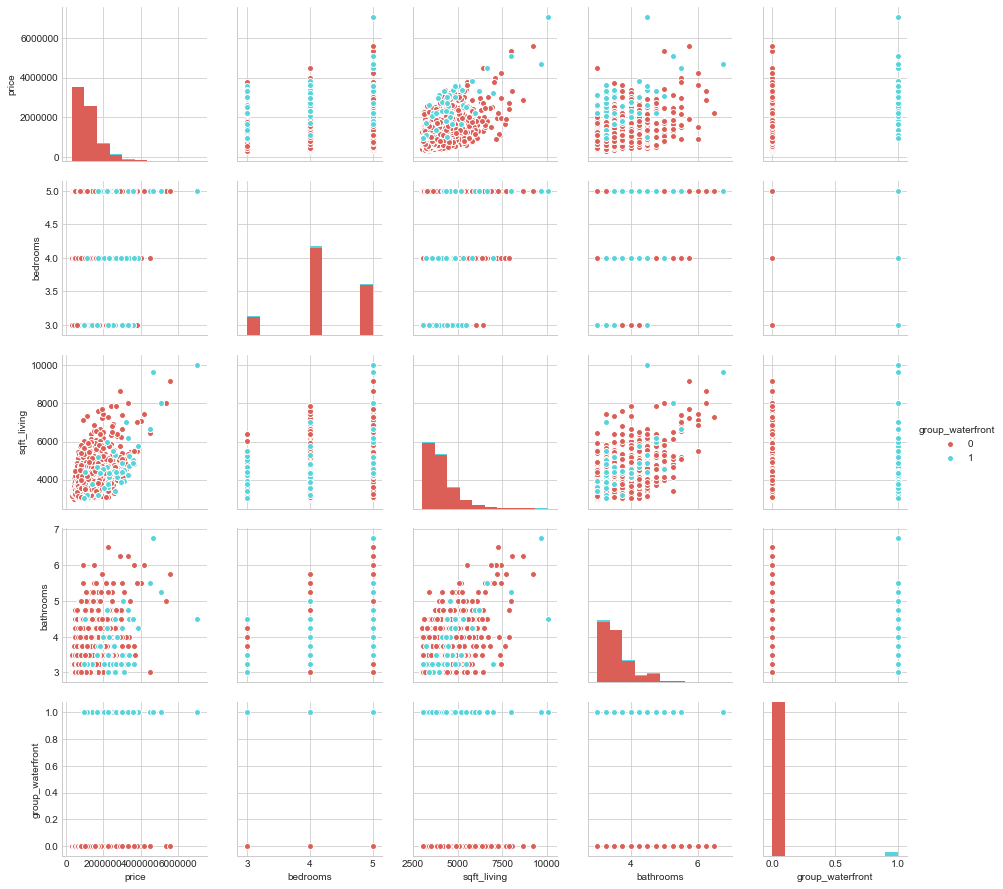

In [443]:
house_df = df.loc[:,['price','bedrooms','sqft_living','bathrooms']]

target_waterfront = df['waterfront']
waterfront_options = [0, 1]          # 0: doesn not have waterfront view, 1: have waterfront view 

# create a new column, 'group' = categorical variable
house_df['group_waterfront'] = pd.Series(target_waterfront, dtype='category')
# pass the name of df we want plotted and hue = 'group': tells Seaborn to pick the colors for the points based on the values in the 'group' column, palette = 'hls': pre-built color palettes
# red dots: no waterfront view, blue dots: yes waterfront view
sb.pairplot(house_df, hue='group_waterfront', palette='hls') 

### Boxplot

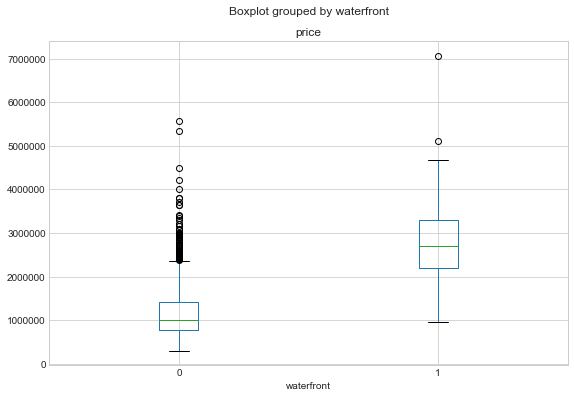

In [444]:
df.boxplot(column='price', by='waterfront')
# df.boxplot(column='bedrooms', by='condition')

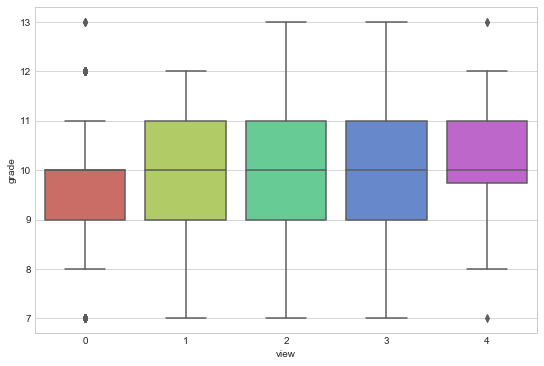

In [445]:
sb.boxplot(x='view', y='grade', data=df, palette='hls')

### Groupby 'view'

In [446]:
selected_features = df[['price','sqft_living','view']]
view_group = selected_features.groupby('view')
view_group.describe()

price                                                              \
       count          mean           std       min        25%        50%   
view                                                                       
0     1029.0  1.081089e+06  5.489766e+05  302000.0   740000.0   929000.0   
1       56.0  1.420672e+06  7.729885e+05  350000.0   857500.0  1212500.0   
2      178.0  1.297594e+06  7.525942e+05  430000.0   856500.0  1153000.0   
3      135.0  1.412332e+06  5.829802e+05  328000.0  1012500.0  1356920.0   
4       92.0  2.163751e+06  1.027160e+06  500000.0  1372425.0  2025000.0   

                           sqft_living                                    \
            75%        max       count         mean          std     min   
view                                                                       
0     1288000.0  5570000.0      1029.0  3911.462585   766.869247  3000.0   
1     1836000.0  3650000.0        56.0  4155.053571   809.860895  3040.0   
2     1490000.0  7062500.0       178.0  4199.584270   966.040574  3030.0   
3     1717500.0  3204000.0       135.0  4261.059259   943.813033  3000.0   
4     2902250.0  5350000.0        92.0  4560.336957  1317.285715  3010.0   

                                       
         25%     50%     75%      max  
view                                   
0     3370.0  3750.0  4230.0   9200.0  
1     3582.5  3895.0  4587.5   6300.0  
2     3562.5  3985.0  4610.0  10040.0  
3     3640.0  4100.0  4650.0   7620.0  
4     3672.5  4335.0  4892.5   9640.0

In [447]:
column_names = df.columns
print('Column_names: ', list(column_names))
df.describe() 

Column_names:  ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.490000e+03,1.490000e+03,1490.00000,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,4.275027e+09,1.216577e+06,4.20000,3.567953,4026.777181,3.248252e+04,1.906711,0.028188,0.795302,3.248993,9.722819,3363.876510,662.900671,1990.495302,134.322148,98062.869128,47.588039,-122.160033,3064.285235,22950.100671
std,2.903487e+09,6.829902e+05,0.63394,0.523977,873.689550,8.167943e+04,0.380460,0.165565,1.299007,0.556193,1.149218,934.491993,675.208827,25.013663,500.963292,48.995412,0.103592,0.140977,849.300457,49627.271753
min,1.150131e+07,3.020000e+05,3.00000,3.000000,3000.000000,2.242000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.470000,980.000000,1288.000000
25%,1.778350e+09,7.846250e+05,4.00000,3.250000,3420.000000,7.072500e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2660.000000,0.000000,1984.250000,0.000000,98027.000000,47.541525,-122.265750,2460.000000,6705.750000
50%,3.630121e+09,1.010000e+06,4.00000,3.500000,3840.000000,1.086100e+04,2.000000,0.000000,0.000000,3.000000,10.000000,3273.000000,695.000000,2000.000000,0.000000,98053.000000,47.594150,-122.172000,3060.000000,10400.000000
75%,7.203220e+09,1.464375e+06,5.00000,3.750000,4370.000000,2.113550e+04,2.000000,0.000000,2.000000,3.000000,10.000000,3920.000000,1110.000000,2006.000000,0.000000,98077.000000,47.658450,-122.058000,3619.500000,17996.000000
max,9.834201e+09,7.062500e+06,5.00000,6.750000,10040.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.776400,-121.691000,6210.000000,871200.000000


### Define parameters:  Prediction target (y) and Features (X)

   index  bedrooms  bathrooms  sqft_living  sqft_lot  grade  sqft_above  \
0      5         4       4.50         5420    101930     11        3890   
1     58         5       3.25         3250     14342      8        3250   
2     70         5       3.25         4770     50094     11        3070   
3     75         4       4.00         3430     35102     10        2390   
4    115         3       3.50         4380      6350      8        2780   

   sqft_basement  zipcode  
0           1530    98053  
1              0    98008  
2           1700    98005  
3           1040    98075  
4           1600    98117  


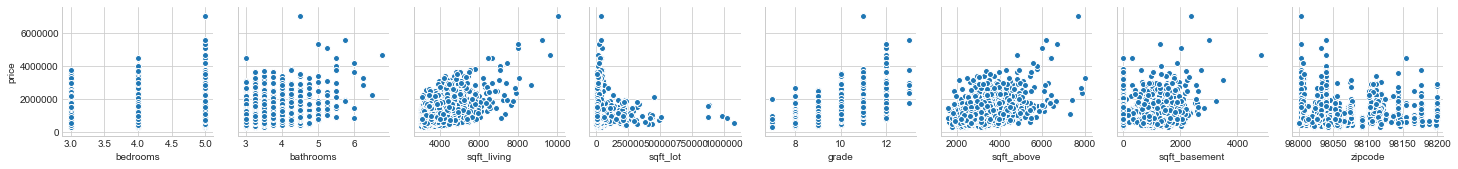

In [448]:
y = df.price     # prediction target, y = predicted house price
# y
features = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','grade','sqft_above','sqft_basement','zipcode']
X = df[features]
X = X.reset_index()  # reset indexes

print(X.head())
sb.pairplot(df, y_vars= 'price', x_vars = features)

### Split the dataset: Training data (2/3) to fit the model and Testing data (1/3) as validation data to calculate MAE

In [449]:
from sklearn.model_selection import train_test_split

# random_state guarantees we get the same split every time we run this script
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state=0)  
print('Size of Train data: ', X_train.shape)
print('Size of Test data: ', X_val.shape)

Size of Train data:  (998, 9)
Size of Test data:  (492, 9)


### 1. Define Model: DecisionTree Model -  Fitting it with the features and target variable

In [450]:
from sklearn.tree import DecisionTreeRegressor

#  Define model : choose a number for a number for random_state to ensure same results each run (considered a good practice)
decision_tree = DecisionTreeRegressor(random_state=1) 

#  Fit model
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### Predict house prices based on the selected features

In [451]:
#  Predict price for the following houses
print('Predictions for the following houses:')
print(X_val)
predicted_price = decision_tree.predict(X_val)
# print(predicted_price)

# print('Predicted Price for each house:')

for idx, price in enumerate(predicted_price):
    print('house %d: $%d' % (idx, price))   

Predictions for the following houses:
      index  bedrooms  bathrooms  sqft_living  sqft_lot  grade  sqft_above  \
9       216         5       3.00         3300     33474      9        1870   
354    5528         4       3.00         3350     23781      9        2020   
1227  19896         4       3.50         3510      9364     10        3510   
907   15118         3       3.25         3790     19000     10        3790   
575    9330         4       3.25         3200      4477      9        2390   
302    4699         4       4.00         4050      9517     11        3360   
703   11680         5       3.75         4130    226076      9        3170   
298    4663         4       3.25         3140     10752      7        2300   
1136  18793         5       3.00         4290     20445     11        4290   
1447  21368         4       3.75         4350      7965     10        4350   
785   12829         4       3.00         3150      9703      9        3150   
1086  18069         4     

### Model Validation:  Mean Absolute Error (MAE) 
<i>error = acutal - predicted</i>

In [452]:
from sklearn.metrics import mean_absolute_error

In [453]:
# with the MAE metric, take the absoluate value of each error => take average of those absoluate errors
# 'On average, our predictions are off by about X'

without_optimal_leaf_nodes = mean_absolute_error(y_val, predicted_price)
print('Error = actual - predicted:  ${:.2f}'.format(without_optimal_leaf_nodes))
print('Average home price: $%.2f' % y_val.mean())

Error = actual - predicted:  $382480.03
Average home price: $1248010.18


**Conclusion:** on average, our predictions are off by about <b>$382,480.03</b> which is very signicant amount in errors. As a point of reference, the average home value in the validation data is roughly <b>1.2 million dollars</b>. So the error in new data is about a quarter of the average home value. There are many ways to imporve this model, such as experimenting to find better features or different model types.

### Find 'Optimal Number of Leaf Nodes' with minimal  MAE from the different values for <I>max_leaf_nodes</I>
<i>Allows to control overfitting vs underfitting: the more leaves, the more we move from underfitting to the overfitting area</i>

In [459]:
def calculate_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    my_model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    my_model.fit(X_train, y_train)
    predicted_val = my_model.predict(X_val)
    my_mae = mean_absolute_error(y_val, predicted_val)
    return my_mae

for max_leaf_nodes in [5, 50, 500, 5000]:
    mae = calculate_mae(max_leaf_nodes, X_train, X_val, y_train, y_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))

Max leaf nodes: 5  		 Mean Absolute Error:  408598
Max leaf nodes: 50  		 Mean Absolute Error:  340518
Max leaf nodes: 500  		 Mean Absolute Error:  395418
Max leaf nodes: 5000  		 Mean Absolute Error:  397011


**Conclusion:** Of the options listed, 50 is the optimal number of leaves.

In [460]:
with_optimal_leaf_nodes = calculate_mae(50, X_train, X_val, y_train, y_val)
print('Using the optimal number of leaves, the error has imporved by $%.2f from $%.2f to $%.2f ' % (without_optimal_leaf_nodes - with_optimal_leaf_nodes, without_optimal_leaf_nodes, with_optimal_leaf_nodes))

Using the optimal number of leaves, the error has imporved by $41961.48 from $382480.03 to $340518.56 


### 2. Define Model: RandomForest Model 
<i>Uses 'many trees': makes a prediction by averaging the predictions of each component tree</i>

In [465]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(X_train, y_train)
prediced_val = random_forest.predict(X_val)
error_with_random_forest = mean_absolute_error(y_val, prediced_val)

print('Using the RandomForest model instead of DecisionTree, the error has improved by $%d from $%d to $%d ' % (with_optimal_leaf_nodes - error_with_random_forest, with_optimal_leaf_nodes, error_with_random_forest))

Using the RandomForest model instead of DecisionTree, the error has improved by $24461 from $340518 to $316057 


**Conclusion:** Using the RandomForest model instead of decisionTree model with the optimal number of leaves, we improved the errors by **24,461**. This is a big improvement over the best decision tree error of 340,000. 

### 2. Define Model: LinearRegression Model 

In [471]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predicted_val = linear_reg.predict(X_val)
error_with_linear_reg = mean_absolute_error(y_val, prediced_val)
# print(error_with_linear_reg)

print('Using the LinearRegression model, the error of %d resulted in the same as using RandomForest model' % error_with_linear_reg)

Using the LinearRegression model, the error of 316057 resulted in the same as using RandomForest model
